<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/Kaggle_Survey_viz_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me(Kaggle Survey Project)

- 취직을 앞둔 나에게 데이터 분석가가 되어 나아가야할 방향을 알고싶어 이 Project를 실시

- 데이터 분석가가 되고자 하는 이들에게도 주요한 Project가 될 것이다.

- 변수들 설명 ==> 'kaggle_survey_2020_answer_choices.pdf'
    - 39+ 질문 and 20,036 답변
    - 단답형 질문과 multiple choices가 있다.

- index[0]에 Questions이 있다. ==> index[0]가 columns로 처리

> feature 전처리
  - 나라(country)이름 처리(replace)
  - 성별(sex) man, woman처리(replace)
  - 나이(age) 처리

> 해야 할 것(To do)
  - EDA : 기본 인적 사항(完)
  - EDA : 연봉과 학위, 직업
  - EDA : DS 교육받는 곳, 가장 필요한 것(skill)




In [78]:
!pip install plotly.express
!pip install --upgrade plotly

     |████████████████████████████████| 22.9 MB 61.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
font = dict(fontsize=20, fontweight='bold', fontfamily='serif')
import plotly.express as px

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2020/kaggle_survey_2020_responses.csv')

In [3]:
data = data.T.reset_index(drop=True).set_index([0]).T  # column 처리
data['In which country do you currently reside?'] = data['In which country do you currently reside?'].replace({'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK', 'United Arab Emirates':'UAE', 'Iran, Islamic Republic of...':'Iran'})  # USA, US 처리

for i in ['Prefer to self-describe', 'Prefer not to say', 'Nonbinary']:
  data['What is your gender? - Selected Choice'] = data['What is your gender? - Selected Choice'].replace({i:np.NaN})  # 성별 man, woman 처리

data['What is your age (# years)?'] = data['What is your age (# years)?'].replace({'22-24':'22-29', '25-29':'22-29', '30-34':'30-39', '35-39':'30-39', '40-44':'40-49', '45-49':'40-49', '50-54':'50-59', '55-59':'50-59'})  # 나이 처리

# 1. EDA : 기본 인적 사항

In [34]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

Text(0.5, 0.98, 'Country(Top 21) - count, pie')

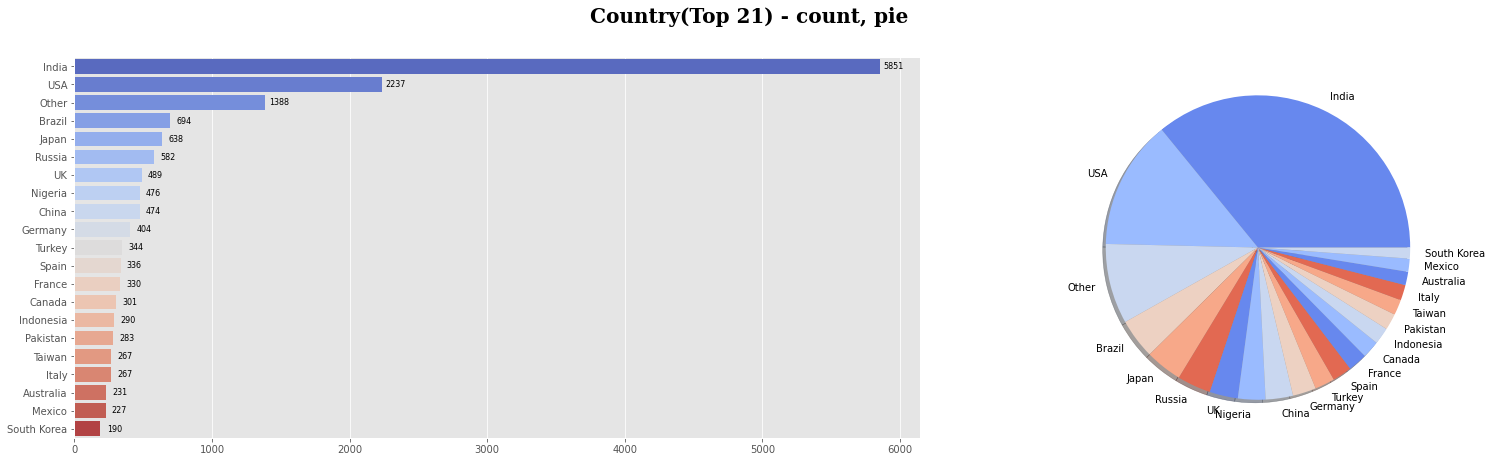

In [37]:
top_21_country = data['In which country do you currently reside?'].value_counts().sort_values(ascending=False)[:21]

fig, ax = plt.subplots(1, 2, figsize=(25,7), gridspec_kw={'width_ratios':[2, 1]})
sns.barplot(y=top_21_country.index, x=top_21_country, palette=sns.color_palette('coolwarm', n_colors=len(top_21_country.index)), ax=ax[0])
ax[0].set_xlabel('')
for i,j in enumerate(top_21_country.index):
  ax[0].annotate(f"{top_21_country[j]}", xy=(top_21_country[j] + 100, i), ha='center', va='center', fontsize=8, fontweight='light')

ax[1].pie(top_21_country, labels=top_21_country.index, shadow=True, colors=sns.color_palette('coolwarm'))

fig.suptitle('Country(Top 21) - count, pie', fontsize=20, fontweight='bold', fontfamily='serif')

Text(0.5, 1.0, 'Distribution of men and women Normalize Ratio')

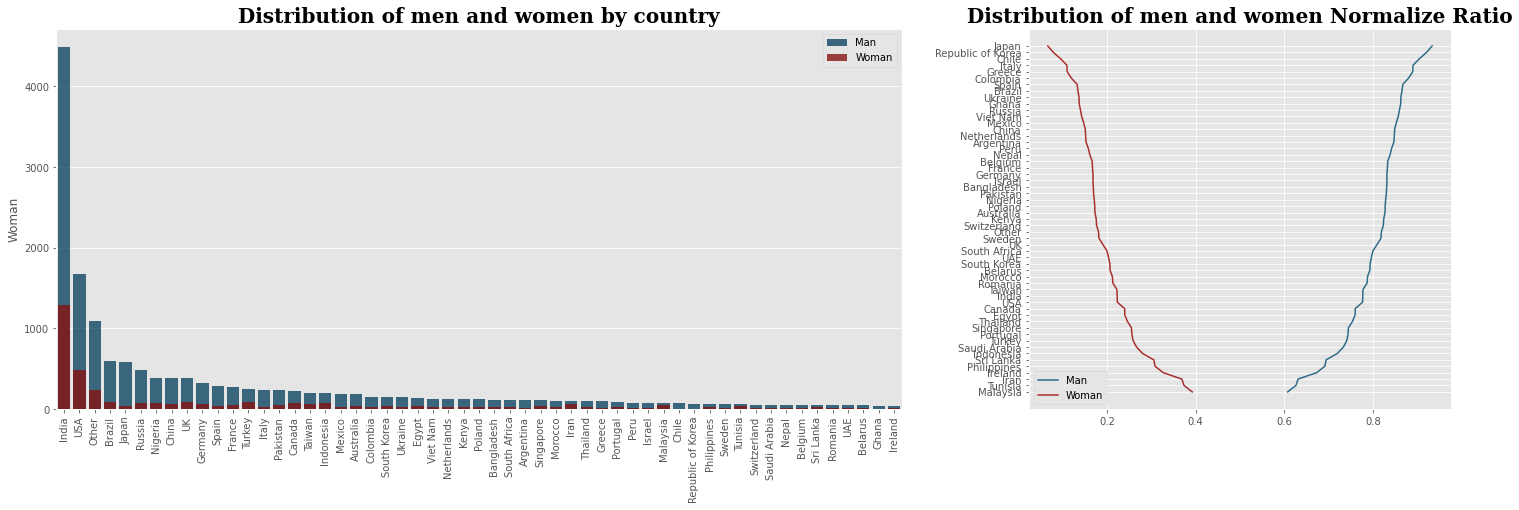

In [30]:
g_r = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts().unstack().sort_values('Man', ascending=False)
fig, ax = plt.subplots(1,2, figsize=(25,7), gridspec_kw={'width_ratios':[2, 1]})
sns.barplot(x=g_r.index, y=g_r['Man'], color='#004c70', label='Man', ax=ax[0], alpha=0.8)
sns.barplot(x=g_r.index, y=g_r['Woman'], color='#990000', label='Woman', ax=ax[0], alpha=0.8)
ax[0].legend()
ax[0].set_xticklabels(g_r.index, rotation=90)
ax[0].set_xlabel('')
ax[0].set_title('Distribution of men and women by country', fontsize=20, fontweight='bold', fontfamily='serif')

r_g = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts(normalize=True).unstack().sort_values('Woman', ascending=False)  # 각 나라의 남녀 비율

ax[1].plot(r_g['Man'], r_g.index, label='Man', color='#004c70', alpha=0.8)
ax[1].plot(r_g['Woman'], r_g.index, label='Woman', color='#990000', alpha=0.8)
ax[1].set_xlabel('sex ratio')
ax[1].legend()
ax[1].set_xlabel('')
ax[1].set_title('Distribution of men and women Normalize Ratio', fontsize=20, fontweight='bold', fontfamily='serif')

Text(0.5, 0.98, 'Distribution of Age by country')

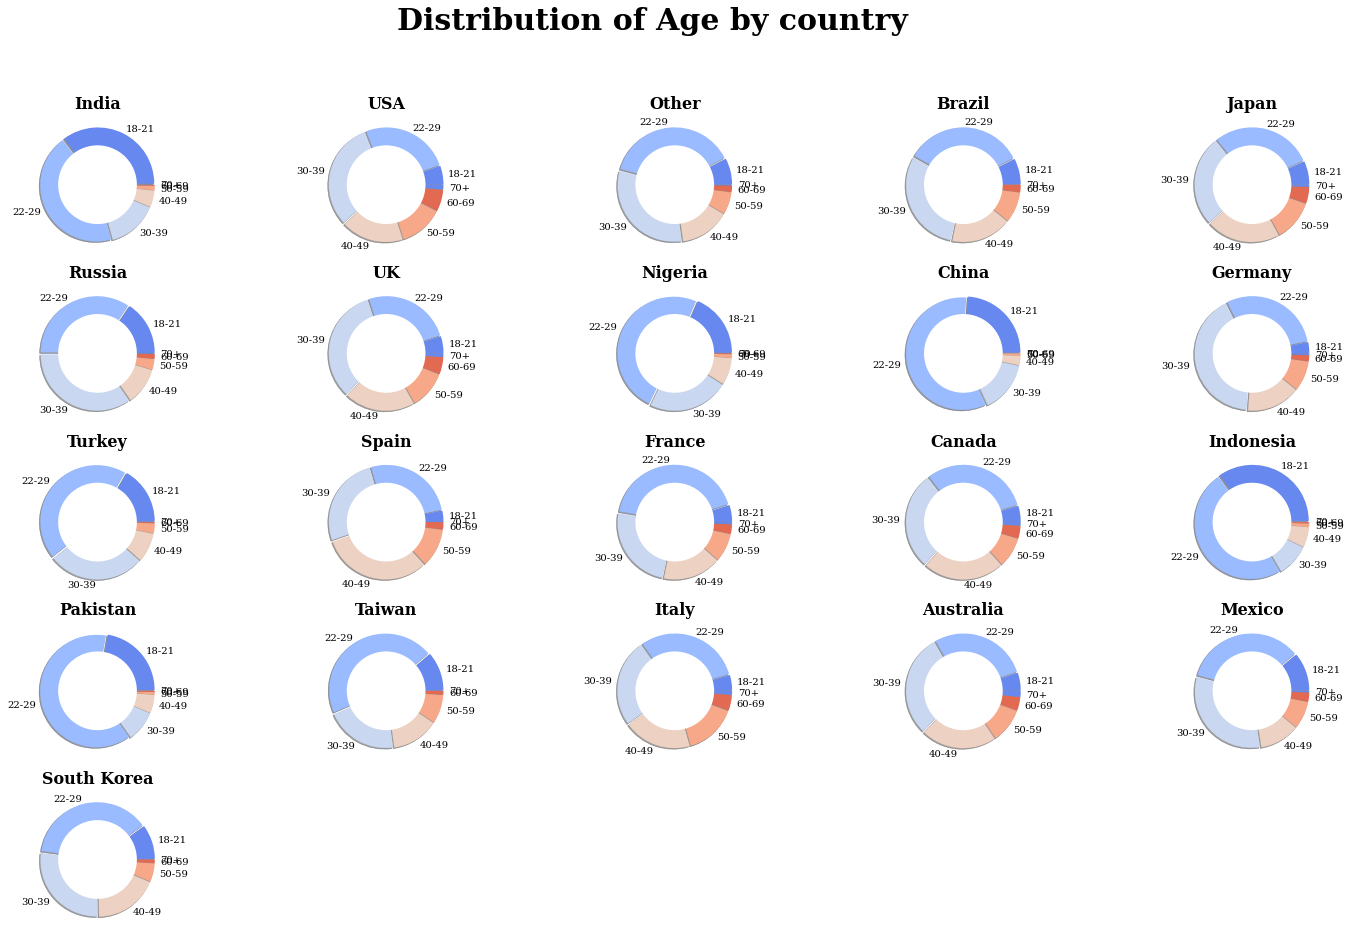

In [33]:
r_a = data.groupby('In which country do you currently reside?')['What is your age (# years)?'].value_counts()[top_21_country.index].unstack().fillna(0).T

fig = plt.figure(figsize=(25,15))
for i,j in enumerate(r_a.columns):
  ax = plt.subplot(5,5, i+1)
  ax.pie(x=r_a[j], labels=r_a[j].index, shadow=True, explode=[0.02 for i in range(len(r_a[j].index))], 
         colors=sns.color_palette('coolwarm'), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Distribution of Age by country', fontsize=30, fontweight='bold', fontfamily='serif')

# 기본 인적사항 EDA으로 알 수 있는 것
- 전체 Answer중 국가(country) 분포(Top21) :
    - Top21 : 'India', 'USA', 'Other', 'Brazil', 'Japan', 'Russia', 'UK', 'Nigeria',
       'China', 'Germany', 'Turkey', 'Spain', 'France', 'Canada', 'Indonesia',
       'Pakistan', 'Taiwan', 'Italy', 'Australia', 'Mexico', 'South Korea' 순  **(Top 21)**
    - India, USA가 차지 하는 비율이 40%
    - 우리나라는 21위 딱 중위권이다. (실망...) --> Data Science에 관심있는 사람이 부족하다는 것을 말한다.
    - 국가별 연봉 분포 viz하기(column=What is your current yearly compensation (approximate $USD)?)

- 전체 Answer중 남녀(sex) 분포 : 
    - 남녀 평균 비율은 8:2 --> Data Science에 관심있는 성별은 남자
    - Top21 국가 중 Japan은 9.3:0.7의 성별분포를 가진다. --> 여성의 비율이 극히 낮음
    - 남녀별 연봉 분포 viz하기


- 전체 Answer중 나이(age) 분포 :
    - 대체로 18-49세까지의 나이가 제일 많이 분포
    - India, Nigeria, China, Indonesia, Pakistan에서 18-29세 이용자가 70% 이상을 차지하고 있다. --> 젊은 Data 분석가가 많음, IT종사자가 많음
    - India, Nigeria, China, Indonesia, Pakistan를 제외하면 22-49세 이용자가 50% 이상을 차지함
    - 1인당 GDP가 높은 나라 일수록 40+ 이용자가 많음



# 2. EDA : 연봉과 학위, 직업

In [55]:
sns.light_palette('seagreen')

[(0.921460863132993, 0.9512120106378944, 0.9302557793948234),
 (0.7732471218789434, 0.8699892163534527, 0.8124399176335058),
 (0.6250333806248938, 0.7887664220690112, 0.6946240558721881),
 (0.4768196393708443, 0.7075436277845695, 0.5768081941108705),
 (0.32860589811679464, 0.6263208335001278, 0.4589923323495529),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353)]

In [4]:
USD = ['$0-999',	'1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',	'5,000-7,499', '7,500-9,999', '10,000-14,999',	'15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']

Text(0.5, 1.0, 'Earn Distribution')

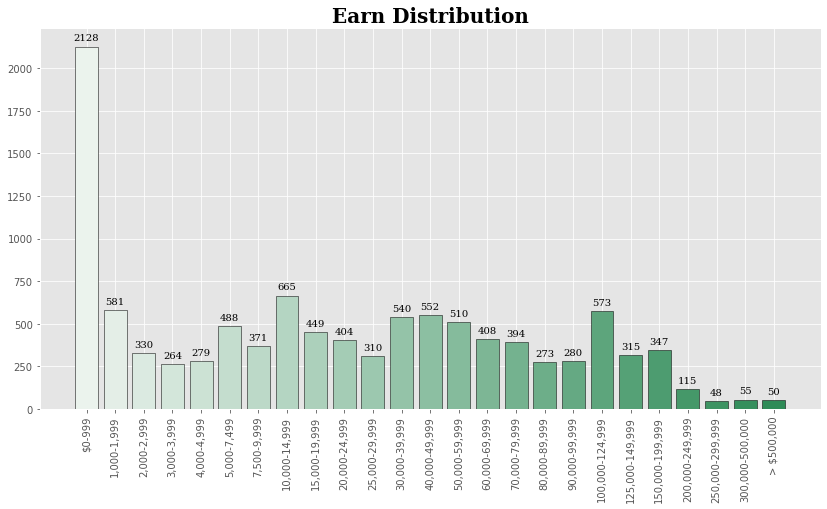

In [5]:
USD_value_counts = data['What is your current yearly compensation (approximate $USD)?'].value_counts()[USD]  # 연봉 value_counts

plt.figure(figsize=(14,7))
plt.bar(USD_value_counts.index, USD_value_counts, color=sns.light_palette('seagreen', n_colors=len(USD_value_counts.index)), edgecolor='black')
for j, i in enumerate(USD_value_counts.index):
  plt.annotate(f"{USD_value_counts[i]}", xy=(j, USD_value_counts[i]+50), ha='center', va='center', fontweight='light', fontfamily='serif')
plt.xticks(rotation=90)
plt.title('Earn Distribution', fontdict=font)

Text(0.5, 1.0, 'Earn&Gender Normalize Ratio')

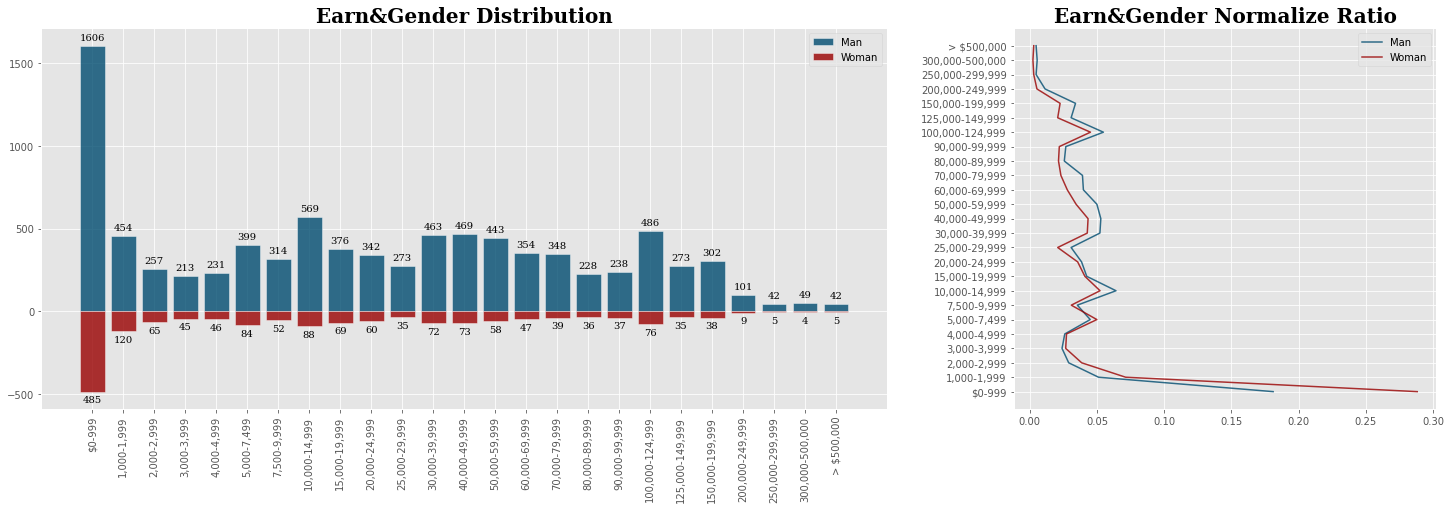

In [58]:
s_c = data.groupby('What is your gender? - Selected Choice')['What is your current yearly compensation (approximate $USD)?'].value_counts().unstack()[USD].T
s_c_normalize = data.groupby('What is your gender? - Selected Choice')['What is your current yearly compensation (approximate $USD)?'].value_counts(normalize=True).unstack()[USD].T

fig, ax = plt.subplots(1,2,figsize=(25,7), gridspec_kw={'width_ratios':[2, 1]})
ax[0].bar(s_c.index, s_c['Man'], label='Man', color='#004c70', alpha=0.8, edgecolor='white')
for j, i in enumerate(s_c.index):
  ax[0].annotate(f"{s_c['Man'].loc[i]}", xy=(j, s_c['Man'].loc[i]+50), ha='center', va='center', fontweight='light', fontfamily='serif')
ax[0].bar(s_c.index, -s_c['Woman'], label='Woman', color='#990000', alpha=0.8, edgecolor='white')
for j, i in enumerate(s_c.index):
  ax[0].annotate(f"{s_c['Woman'].loc[i]}", xy=(j, -s_c['Woman'].loc[i]-50), ha='center', va='center', fontweight='light', fontfamily='serif')

ax[0].legend()
ax[0].set_xticklabels(s_c.index ,rotation=90)
ax[0].set_title('Earn&Gender Distribution', fontdict=font)

ax[1].plot(s_c_normalize['Man'], s_c_normalize.index, color='#004c70', label='Man', alpha=0.8)
ax[1].plot(s_c_normalize['Woman'], s_c_normalize.index, color='#990000', label='Woman', alpha=0.8)
ax[1].legend()
ax[1].set_title('Earn&Gender Normalize Ratio', fontdict=font)

Text(0.5, 0.98, 'Salary distribution by country(Top25 Country)')

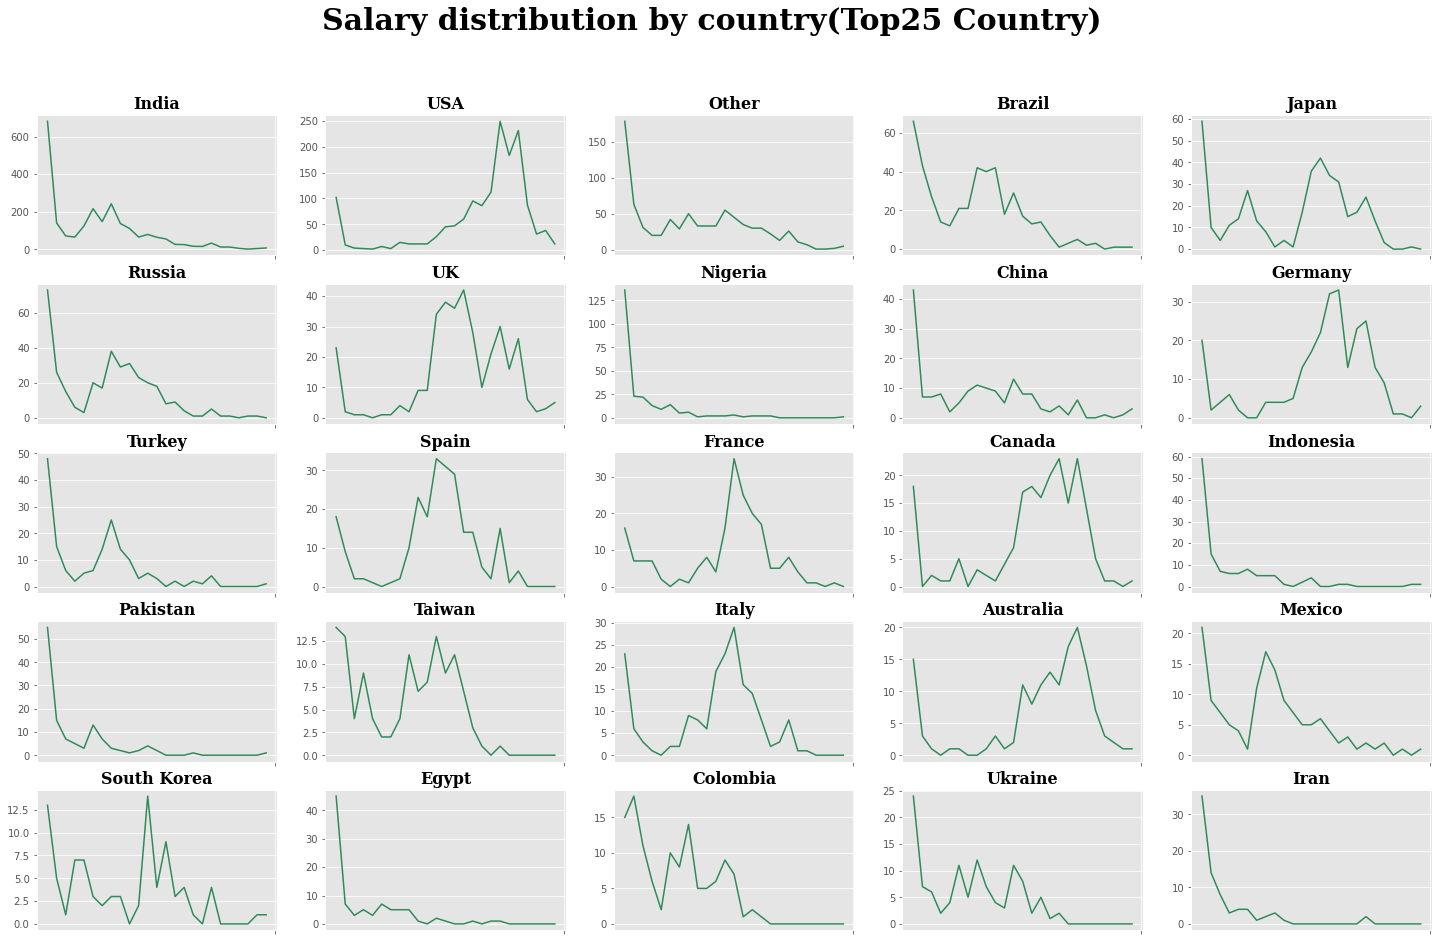

In [5]:
top_25_country = data['In which country do you currently reside?'].value_counts()[:25].index
c_r = data.groupby('What is your current yearly compensation (approximate $USD)?')['In which country do you currently reside?'].value_counts().unstack()[top_25_country].T[USD].fillna(0).T

fig = plt.figure(figsize=(25,15))
for j, i in enumerate(c_r.columns):
  plt.subplot(5,5, j+1)
  sns.lineplot(c_r.index, c_r[i], color=sns.light_palette('seagreen')[5])
  plt.xticks('')
  plt.xlabel('')
  plt.ylabel('')
  plt.title(f'{i}', fontsize=16, fontfamily='serif', fontweight='bold')

plt.suptitle('Salary distribution by country(Top25 Country)', fontsize=30, fontweight='bold', fontfamily='serif')

Text(0.5, 0.98, 'Distribution of Age by Salary')

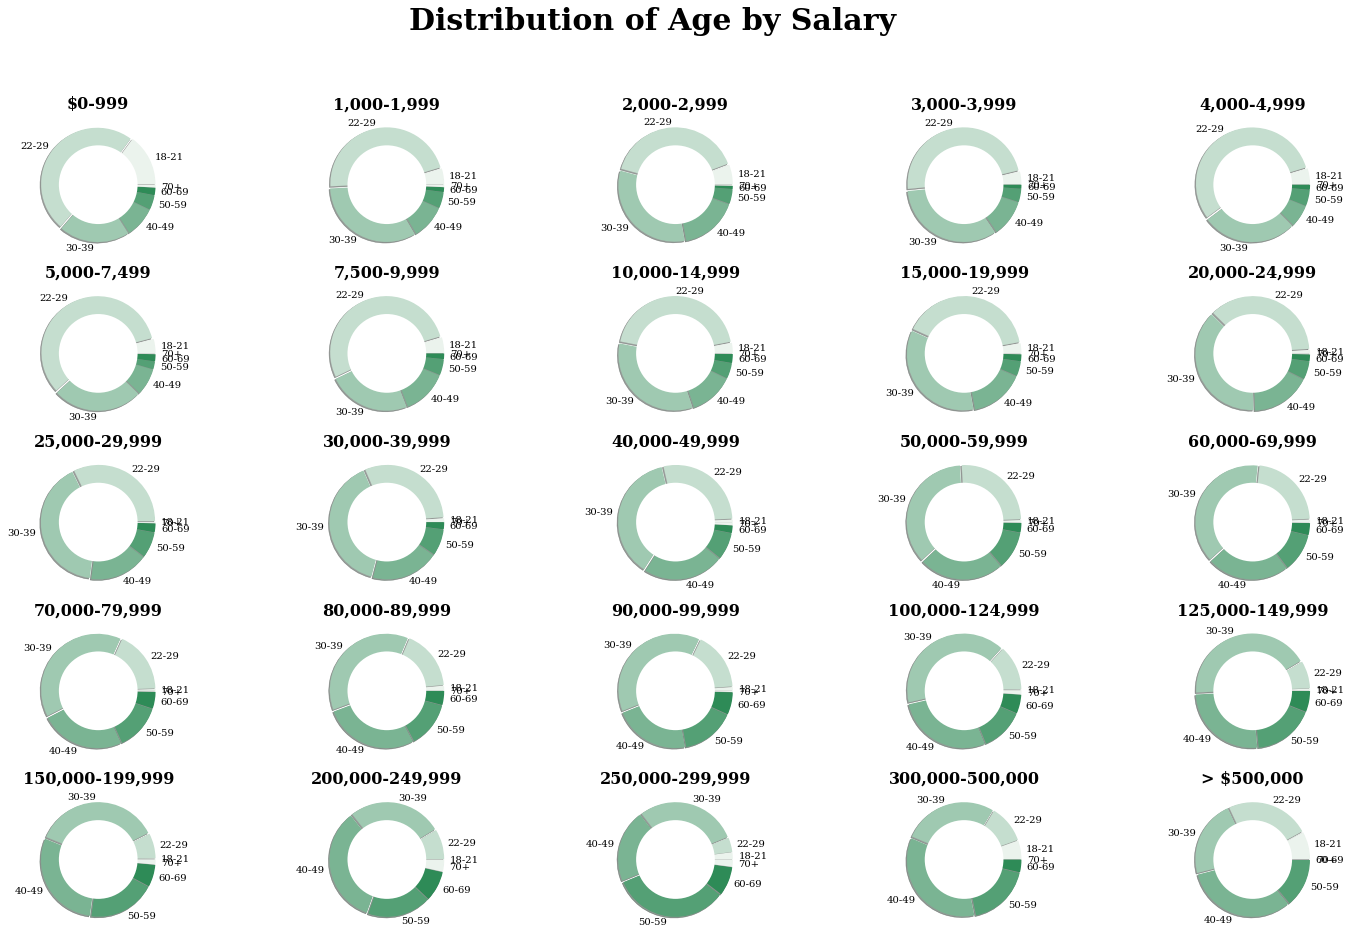

In [35]:
y_s = data.groupby(['What is your age (# years)?'])['What is your current yearly compensation (approximate $USD)?'].value_counts().unstack().fillna(0)[USD]

fig = plt.figure(figsize=(25,15))
for i,j in enumerate(y_s.columns):
  ax = plt.subplot(5,5, i+1)
  ax.pie(x=y_s[j], labels=y_s[j].index, shadow=True, explode=[0.02 for i in range(len(y_s[j].index))], 
         colors=sns.light_palette('seagreen'), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Distribution of Age by Salary', fontsize=30, fontweight='bold', fontfamily='serif')

# 위 시각화로 알 수 있는 것

- 제시된 금액은 연봉이다.($)

- 0-999의 연봉자의 분포가 가장 높다. --> 인건비가 싼 India, Nigeria, China,  Indonesia의 존재 때문

- 남녀 임금 차이는 0-999의 연봉자 여성의 비율이 0-999 연봉자 남성보다 높았다. 하지만 나머지 고액 연봉은 남성의 비율이 좀 더 높았다. --> 고액 연봉자 비율은 남성이 더 높다.

- USA, UK, Germany, Spain, France, Canada, Italy, Australia, South Korea는 0-999 연봉자보다 훨씬 고액의 연봉자가 더 많다. --> 1인당 GDP가 높은 나라는 고액 연봉자의 비율이 더 높다.

- 당연하겠지만 나이가 많아질수록 연봉이 올라감

- Age vs Salary에서 눈 여겨 봐야 할 것은 >500,000의 분포인데 18-21, 22-29세 분포가 높다는 것이다.(이상 값이 아닐까...? 이상 값이었으면 좋겠다...)

# 더 알아보고 싶은 것  
- 남녀 연봉 차이가 왜 나는 것인가? (完)

- 학력에 따라 연봉 차이가 얼마나 나는가?

- 여러 스킬별로 연봉 차이가 어떻게 나는가? --> 특정 언어가 중요한가? 아님 여러가지를 하는 것이 중요한가?


---



# 남녀 연봉 차이가 왜 나는 것인가? 
에 대한 답 --> Japan과 같이 남성의 비율이 특히 높은 나라들 때문이다.(여성이 아예 없기도 한 연봉 구간이 있다.)

In [13]:
# plotly ver
data_crg = data.groupby(['What is your current yearly compensation (approximate $USD)?', 'In which country do you currently reside?'])['What is your gender? - Selected Choice'].value_counts().reset_index(name='count')

fig = px.treemap(data_frame=data_crg, path=['In which country do you currently reside?', 'What is your current yearly compensation (approximate $USD)?', 'What is your gender? - Selected Choice'], values='count', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='Country vs Salary',font={'size':20, 'family':'sans-serif', 'color':'#4a4a4a'} )
fig.add_annotation(text="vs Gender",
                  xref="paper", yref="paper",
                  x=-0.007, y=1.06, showarrow=False,
                  font={'size':20, 'family':'serif', 'color':'#4a4a4a'})

In [39]:
data.iloc[:,80:150]

,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests,"Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Gradient Boosting Machines (xgboost, lightgbm, etc)",Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Bayesian Approaches,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Evolutionary Approaches,"Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Dense Neural Networks (MLPs, etc)",Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Convolutional Neural Networks,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Generative Adversarial Networks,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Recurrent Neural Networks,"Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Transformer Networks (BERT, gpt-3, etc)",Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - None,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other,"Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)","Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - Image segmentation methods (U-Net, Mask R-CNN, etc)","Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - Object detection methods (YOLOv3, RetinaNet, etc)","Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)","Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - Generative Networks (GAN, VAE, etc)",Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice - Other,"Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Encoder-decorder models (seq2seq, vanilla transformers)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)",Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select a